<center> <h1> <i>Introduction to Computer Vision</h1>
<h2>Homework</h2> 
<h3>03/06/2024</h3></center>
<h4>Professor : Mehdi Zakroum </h4>

 Work by :
<li> Yassine Hamzaoui </h3>
<li>Ahmed Amine Hmamouchi </h3>

<h2>Introduction : </h2>

Convolutional Neural Networks (CNNs) are a class of deep learning models that have proven exceptionally effective for processing and analyzing visual data. Unlike traditional neural networks, CNNs utilize filters, also known as kernels, which slide over the input data to capture spatial hierarchies and local patterns. These filters enable the network to automatically learn features such as edges, textures, and more complex structures at different layers, making CNNs particularly adept at handling image data. 

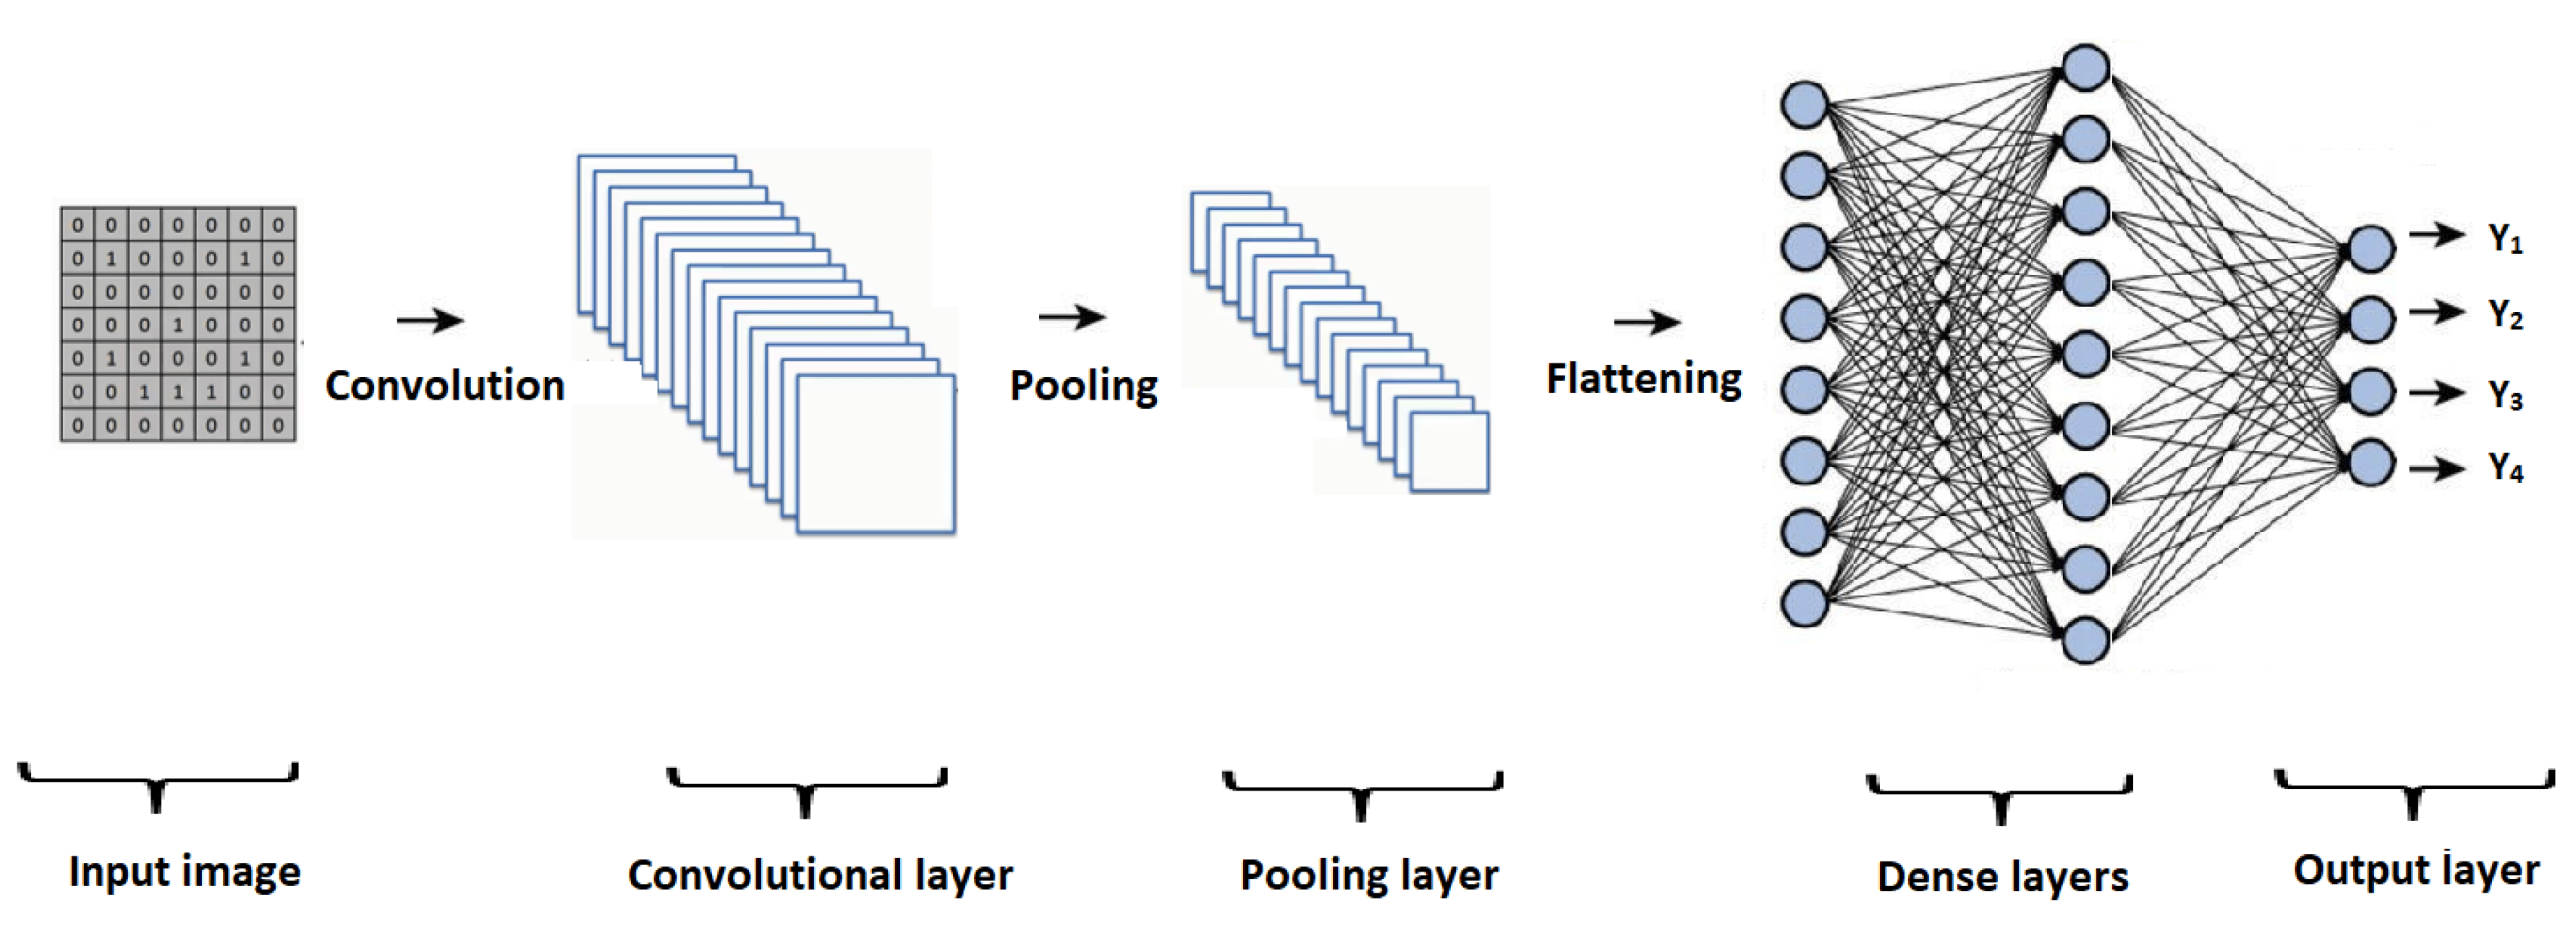

The CIFAR-10 dataset, a benchmark in machine learning, consists of 60,000 32x32 color images across 10 classes, such as airplanes, cars, and birds. Due to the dataset's diversity and size, it provides an excellent platform for training and evaluating CNNs.

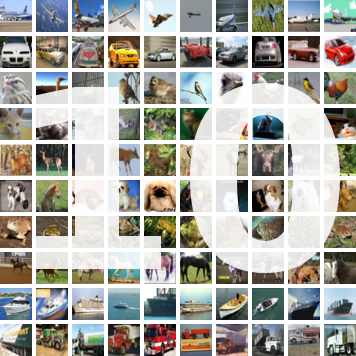

The goal of this homework is to train a Convolutional Neural Network (CNN) to perform a classification task on the CIFAR-10 dataset. The classification involves categorizing objects in the CIFAR-10 dataset into two groups:

<li>Can fly (class 1): grouping objects that can fly, such as birds and airplanes.</li>
<li>Cannot fly (class 0): grouping objects that cannot fly, such as frogs, deer, trucks, etc.</li>

In this work, we will see the difference in terms of performance between traditional neural networks and CNNs, highlighting the superior capability of CNNs in handling complex image data. The CIFAR-10 dataset provides an excellent platform for this comparison due to its diversity and size, making it ideal for training and evaluating CNNs. By using filters, CNNs can efficiently extract meaningful features from CIFAR-10 images, leading to higher performance in image classification tasks and demonstrating their effectiveness over traditional neural networks.

After training, we'll assess the model's performance using a separate testing set. We'll calculate precision, recall, F1 score, and accuracy to gauge its effectiveness in classification tasks. Additionally, we'll generate a confusion matrix to visualize the model's predictions against actual labels, providing insights into its classification behavior.

<h2> Convolutional Neural Network Classification of CIFAR10 Dataset into Two Categories :</h2>

<h4><u>Important libraries :</h4>

In [167]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np
from tabulate import tabulate

%matplotlib inline

<h4><u>Dataset importation :</h4>

In [168]:
tf.keras.backend.image_data_format = 'channels_last'
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

<h4><u>Image scaling :</h4>

In [169]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train = x_train / 255.
x_test = x_test / 255.

<h4><u>Visualisations of images and their corresponding labels :</h4>

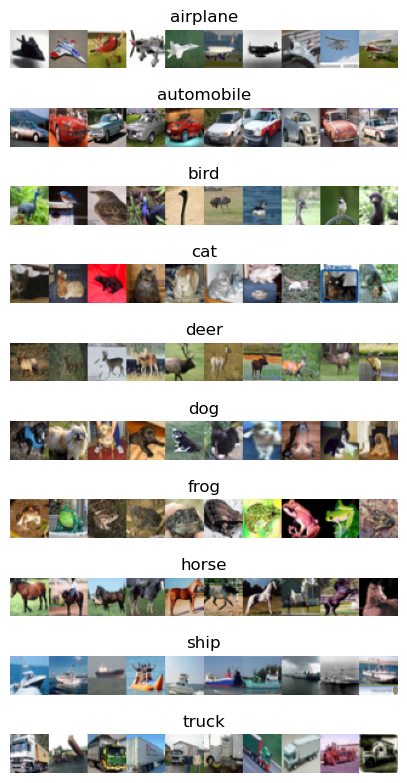

In [170]:
# Plot some images and their corresponding labels

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

labels = dict(zip(range(10), labels))

plt.figure(figsize = (5, 10))
for i in range(10):
    idx = np.argwhere(y_train.flatten() == i).flatten()
    idx = list(idx[:10])
    imgs = np.hstack(x_train[idx])
    plt.subplot(10, 1, i + 1)
    plt.imshow(imgs)
    plt.title(labels[i])
    plt.axis('off')
plt.show()

<h4> <u>Assignement of new labels for our specefic classification task :</h4>

In [171]:
newLabels = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# Convert the newLabels list into a numpy array for easier indexing
newLabels_array = np.array(newLabels)

# Update the labels in y_train and y_test
y_train_new = newLabels_array[y_train.flatten()]
y_test_new = newLabels_array[y_test.flatten()]

y_train_oh = tf.keras.utils.to_categorical(y_train_new)
y_test_oh = tf.keras.utils.to_categorical(y_test_new)
# Reshape the labels back to their original shape
y_train_new = y_train_new.reshape(y_train.shape)
y_test_new = y_test_new.reshape(y_test.shape)

print(x_train.shape, y_train_oh.shape, x_test.shape, y_test_oh.shape)

(50000, 32, 32, 3) (50000, 2) (10000, 32, 32, 3) (10000, 2)


A new set of binary labels is defined in the newLabels list, where each label corresponds to a class (either 1 "can fly" or 0 "cannot fly"). 

<h4><u>Visualisations of images and their new labels :</h4>

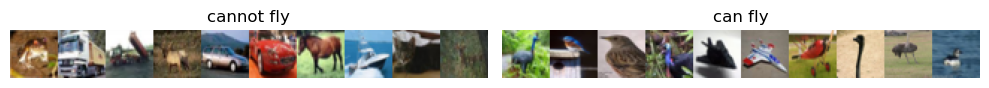

In [172]:
# labels for plotting
labels = {0: 'cannot fly', 1: 'can fly'}

plt.figure(figsize=(10, 5))
for i in range(2):
    idx = np.argwhere(y_train_new.flatten() == i).flatten()
    idx = list(idx[:10])
    imgs = np.hstack(x_train[idx])
    plt.subplot(1, 2, i + 1)
    plt.imshow(imgs)
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

<h4><u> Training a Multi-Layer Perceptron for Image Classification (NOT CNN) :</h4>

Initially, we commenced training with a traditional neural network architecture devoid of any filters, aiming to establish a baseline performance before transitioning to a convolutional neural network (CNN). 

 Throughout this initial phase, the neural network will undergo iterative training epochs, processing batches of data, updating its parameters, and assessing its performance on both the training and validation datasets. This traditional neural network, lacking the ability to extract spatial features through convolutional filters will serve as a starting point to gauge the effectiveness and improvement achieved by CNNs. 

In [173]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = x_train[0].shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Activation('softmax'),
])

model1.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.05), 
              metrics=['accuracy'])

print(model1.summary())

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_83 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_84 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_85 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,546 (3.07 MB)

 Trainable params: 803,906 (3.07 MB)

 Non-trainable params: 640 (2.50 KB)

None


The model "sequential_12" is a neural network architecture designed for classification tasks. It begins with a Flatten layer to transform the input data into a one-dimensional array. This is followed by two dense layers, each with batch normalization, activation, and dropout layers to enhance learning and prevent overfitting. The first dense layer consists of 256 neurons, while the second one has 64 neurons. The final dense layer with two neurons serves as the output layer for binary classification. 

Overall, the model contains 804,546 parameters, with the majority being trainable.

In [174]:
history = model1.fit(x_train, y_train_oh, epochs=200, batch_size=64, validation_split=0.15)

Epoch 1/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5725 - loss: 0.8886 - val_accuracy: 0.8083 - val_loss: 0.4563
Epoch 2/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7736 - loss: 0.5348 - val_accuracy: 0.8248 - val_loss: 0.4217
Epoch 3/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7878 - loss: 0.5014 - val_accuracy: 0.8247 - val_loss: 0.4149
Epoch 4/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8026 - loss: 0.4715 - val_accuracy: 0.8261 - val_loss: 0.4101
Epoch 5/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8145 - loss: 0.4432 - val_accuracy: 0.8277 - val_loss: 0.4195
Epoch 6/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8185 - loss: 0.4337 - val_accuracy: 0.8273 - val_loss: 0.4006
Epoch 7/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8195 - loss: 0.4296 - val_accuracy: 0.8283 - val_loss: 0.3996
Epoch 8/200
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8246 - loss: 0.4176 - val_accu

The model's performance was evaluated and refined. Each epoch involved processing a batch of data, updating the model's weights and biases, and assessing its performance on both the training and validation datasets.

In [175]:
def plot(history):
    plt.figure()
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Train', 'Validation'])
    plt.show()

This code visually represents how the loss values of the model change over epochs during training and validation, providing insights into the model's performance and the effectiveness of the training process.

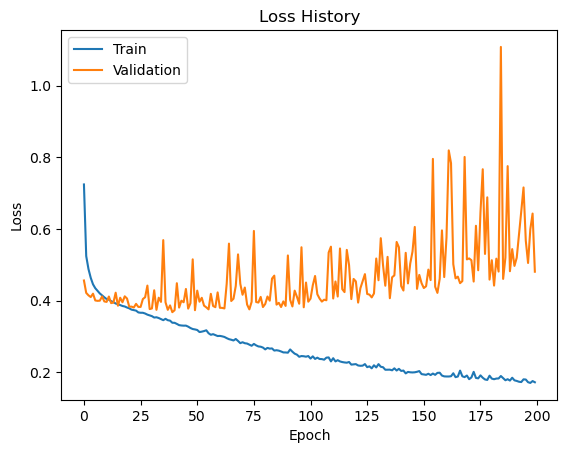

In [176]:
plot(history)

The loss history graph shows the training and validation loss over 200 epochs. The training loss (blue line) consistently decreases over time, showing good convergence. The validation loss (orange line) initially decreases but then starts to fluctuate significantly, indicating a potential overfitting issue.
The consistent decrease in training loss suggests that the model is learning effectively from the training data. The fluctuating validation loss indicates that the model is not generalizing well to unseen data and may be overfitting. This is particularly evident as the validation loss increases significantly towards the end of the training.

In [177]:
# Get predictions from the model
y_pred_probs = model1.predict(x_test)  # Predict probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test back to class labels
y_true_classes = np.argmax(y_test_oh, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='binary')
recall = recall_score(y_true_classes, y_pred_classes, average='binary')
f1 = f1_score(y_true_classes, y_pred_classes, average='binary')
accuracy = accuracy_score(y_true_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

metrics_dict = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
}

# Print metrics table
print(tabulate(metrics_dict, headers='keys', tablefmt='fancy_grid'))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
╒═══════════╤══════════╕
│ Metric    │    Score │
╞═══════════╪══════════╡
│ Precision │ 0.668206 │
├───────────┼──────────┤
│ Recall    │ 0.434    │
├───────────┼──────────┤
│ F1 Score  │ 0.52622  │
├───────────┼──────────┤
│ Accuracy  │ 0.8437   │
╘═══════════╧══════════╛



<u>Performance metrics</u>
<p>-Precision (0.668206): The model correctly identifies 66.82% of the positive instances out of all instances it predicted as positive. This indicates a moderate rate of false positives.</p>
<p>-Recall (0.434) : The model correctly identifies 43.4% of the actual positive instances. This indicates a relatively high rate of false negatives.</p>
<p>-F1 Score (0.52622) : This is the harmonic mean of precision and recall, providing a balance between the two. The score of 0.52622 indicates the model has a moderate overall performance but struggles with recall.</p>
<p>-Accuracy (0.8437) : The model correctly classifies 84.37% of the instances overall. However, given the imbalance suggested by other metrics, accuracy alone may not fully represent the model’s effectiveness.</p>

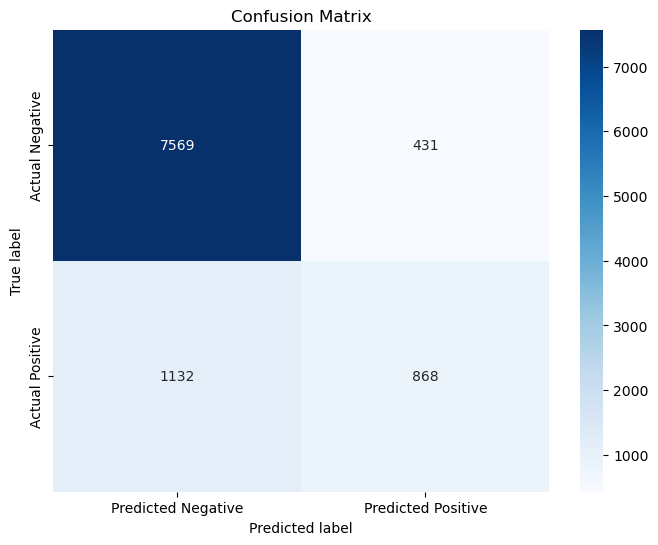

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


<u>Confusion matrix</u>
<p>The confusion matrix shows that the model performs well in predicting negative instances but struggles with positive instances. The high number of false negatives (1132) compared to true positives (868) further confirms the low recall, meaning the model misses many actual positive instances. The number of false positives (431) is lower, aligning with the relatively higher precision.</p>

In [179]:
# As you can see, the MLP tends to overfit when solving computer vision problems. 
# Let's now implement a deep convolutional neural network (CNN) and apply it on the CIFAR10 classification task.

# Fit a CNN having the following architecture:

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Activation('softmax')
])

model2.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.005), 
              metrics=['accuracy'])

print(model2.summary())

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_86 (Activation)      │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_87 (Activation)      │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,458 (310.38 KB)

 Trainable params: 79,234 (309.51 KB)

 Non-trainable params: 224 (896.00 B)

None


The model "sequential_15" represents a convolutional neural network (CNN) architecture tailored for image classification tasks. Unlike the previous model, "sequential_12," which relied solely on densely connected layers, "sequential_15" integrates convolutional layers, enabling it to extract spatial hierarchies of features from the input images. By incorporating 16 and 32 filters in its initial convolutional layers, followed by activation functions, batch normalization, and max-pooling operations, the model progressively learns hierarchical representations of the input data. This architecture facilitates feature extraction and dimensionality reduction, leading to more efficient and effective classification. Moreover, "sequential_15" employs techniques like dropout regularization to mitigate overfitting and improve generalization performance. Despite having fewer parameters compared to "sequential_12," "sequential_15" leverages the power of convolutional operations to potentially achieve superior classification accuracy and robustness in handling image data.

In [180]:
history = model2.fit(x_train, y_train_oh, epochs=200, batch_size=32, validation_split=0.15)

Epoch 1/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7082 - loss: 0.6173 - val_accuracy: 0.8243 - val_loss: 0.4093
Epoch 2/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8034 - loss: 0.4643 - val_accuracy: 0.8376 - val_loss: 0.3871
Epoch 3/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8146 - loss: 0.4344 - val_accuracy: 0.8445 - val_loss: 0.3701
Epoch 4/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8274 - loss: 0.4011 - val_accuracy: 0.8292 - val_loss: 0.3956
Epoch 5/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8374 - loss: 0.3822 - val_accuracy: 0.8529 - val_loss: 0.3492
Epoch 6/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8369 - loss: 0.3822 - val_accuracy: 0.8521 - val_loss: 0.3475
Epoch 7/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8445 - loss: 0.3685 - val_accuracy: 0.8477 - val_loss: 0.3546
Epoch 8/200
1329/1329 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.847

the model was effectively learning and improving over time, occasional variations in performance were observed on the validation set. Nonetheless, the overall trend indicated consistent progress towards better classification accuracy and reduced loss.

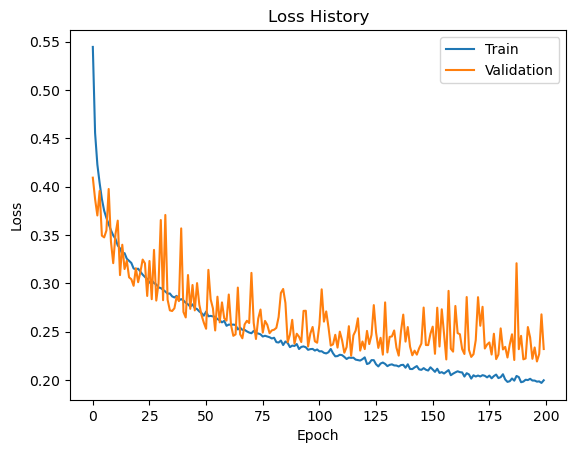

In [181]:
plot(history)

The loss history graph shows the training and validation loss over 200 epochs. Both the training loss (blue line) and validation loss (orange line) consistently decrease over time, with some fluctuations in the validation loss.
The consistent decrease in training loss indicates that the model is effectively learning from the training data. The validation loss also decreases overall, though it fluctuates, which suggests that the model is generally able to generalize well to unseen data, but there may be minor overfitting as indicated by the fluctuations.

In [182]:


# Get predictions from the model
y_pred_probs = model2.predict(x_test)  # Predict probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test back to class labels
y_true_classes = np.argmax(y_test_oh, axis=1)

# Calculate metrics
precision = precision_score(y_true_classes, y_pred_classes, average='binary')
recall = recall_score(y_true_classes, y_pred_classes, average='binary')
f1 = f1_score(y_true_classes, y_pred_classes, average='binary')
accuracy = accuracy_score(y_true_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)


# Create a dictionary for metrics
metrics_dict = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Score': [precision, recall, f1, accuracy]
}

# Print metrics table
print(tabulate(metrics_dict, headers='keys', tablefmt='fancy_grid'))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
╒═══════════╤══════════╕
│ Metric    │    Score │
╞═══════════╪══════════╡
│ Precision │ 0.880168 │
├───────────┼──────────┤
│ Recall    │ 0.628    │
├───────────┼──────────┤
│ F1 Score  │ 0.733003 │
├───────────┼──────────┤
│ Accuracy  │ 0.9085   │
╘═══════════╧══════════╛


<u>Performance metrics</u>

<p>-Precision (0.880168) : The model correctly identifies 88.02% of the positive instances out of all instances it predicted as positive. This indicates a low rate of false positives.
<p>-Recall (0.628) : The model correctly identifies 62.8% of the actual positive instances, which means it misses about 37.2% of the true positives.
<p>-F1 Score (0.733003) : This is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The score of 0.733003 suggests a good overall performance, with a better balance between precision and recall.
<p>-Accuracy (0.9085) : The model correctly classifies 90.85% of the instances overall, reflecting strong performance.

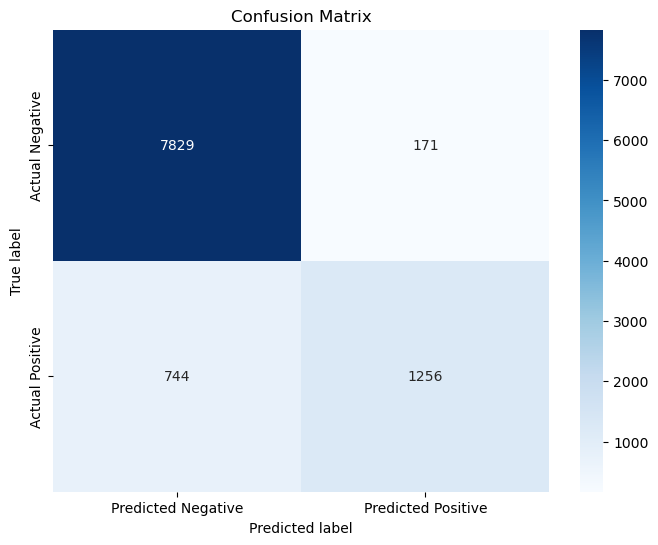

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


<u>Confusion matrix</u>

The confusion matrix shows that the model performs very well in predicting negative instances (high true negatives and low false positives). The number of false negatives (744) compared to true positives (1256) indicates that the model has a relatively higher recall compared to the first model, but there is still room for improvement. The low number of false positives (171) confirms the high precision of the model, meaning it is very good at correctly predicting positive instances.

<h4><u>Comparision of CNN VS traditional neural network :

<u><i>Loss History Comparison</i></u>

<p>The loss history graphs for both models show that the training loss consistently decreases over time, indicating that both models are learning effectively from the training data. However, there are notable differences in the validation loss. In the first model, the validation loss fluctuates significantly after the initial epochs and increases towards the end, suggesting overfitting. In contrast, the second model shows a more stable and consistently decreasing validation loss, indicating better generalization to unseen data.

<u><i>Performance Metrics Comparison</i></u>

<p>-Precision: First Model: 0.668206 vs Second Model: 0.880168
The second model has a significantly higher precision, indicating that it is much better at correctly identifying positive instances and has a lower rate of false positives.
<p>-Recall: First Model: 0.434 vs Second Model: 0.628
The second model also shows a substantial improvement in recall, meaning it correctly identifies a higher proportion of actual positive instances and has a lower rate of false negatives compared to the first model.
<p>-F1 Score: First Model: 0.52622 vs Second Model: 0.733003
The F1 score, which balances precision and recall, is higher in the second model, reflecting a better overall performance in terms of both precision and recall.
<p>-Accuracy: First Model: 0.8437 vs Second Model: 0.9085
The second model achieves higher accuracy, indicating it correctly classifies a greater proportion of all instances.

<u><i>Confusion Matrix Comparison</i></u>

<p>The confusion matrices provide further insight into the models' performance. The first model has a higher number of false negatives (1132) compared to true positives (868), while the second model has fewer false negatives (744) and a higher number of true positives (1256). This further confirms the better recall of the second model. Additionally, the second model has fewer false positives (171) compared to the first model (431), corroborating the higher precision observed in the performance metrics.


<h2>Conclusion : </h2>


In conclusion, the transition from a traditional neural network to a convolutional neural network (CNN) architecture significantly enhanced the performance of the classification task focused on determining whether an object can fly or not. CNNs proved to be exceptionally adept at analyzing visual data, leveraging their ability to capture spatial hierarchies of features to discern intricate patterns indicative of flight, such as wing structures and aerodynamic characteristics. The spatial awareness and feature extraction capabilities of CNNs, coupled with their parameter efficiency, enabled them to learn discriminative features from large-scale datasets without overfitting, ultimately leading to superior accuracy in classification compared to traditional neural networks. 